In [2]:
import pandas as pd
data = {
    'Accuracy': ["100%", "93.80%", "97.70%", "94.60%", "100%", "93.70%", "97.90%", "100%",
                 "94%", "99%", "100%", "97.10%", "100%", "100%", "97.90%", "99.20%"],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45,
                  1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}

df = pd.DataFrame(data)
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

def assign_manual_label(row):
    accuracy = row['Accuracy']
    avg_time = row['Avg. Time']

    if accuracy < 95:
        return 'Low-Performance'
    elif accuracy > 99 and avg_time < 2.5:
        return 'High-Performance'
    else:
        return 'Balanced'

df['Manual_Label'] = df.apply(assign_manual_label, axis=1)

print("--- Data with Manual Labels ---")
print(df[['Accuracy', 'Avg. Time', 'Manual_Label']])

--- Data with Manual Labels ---
    Accuracy  Avg. Time      Manual_Label
0      100.0       1.91  High-Performance
1       93.8       3.42   Low-Performance
2       97.7       2.06          Balanced
3       94.6       2.45   Low-Performance
4      100.0       2.42  High-Performance
5       93.7       1.90   Low-Performance
6       97.9       3.83          Balanced
7      100.0       1.45  High-Performance
8       94.0       1.08   Low-Performance
9       99.0       1.81          Balanced
10     100.0       4.14          Balanced
11      97.1       1.69          Balanced
12     100.0       1.36  High-Performance
13     100.0       2.16  High-Performance
14      97.9       1.88          Balanced
15      99.2       1.46  High-Performance


In [3]:
import pandas as pd
import numpy as np

data = {
    'Accuracy': ["100%", "93.80%", "97.70%", "94.60%", "100%", "93.70%", "97.90%", "100%",
                 "94%", "99%", "100%", "97.10%", "100%", "100%", "97.90%", "99.20%"],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45,
                  1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}
df = pd.DataFrame(data)
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

def assign_manual_label(row):
    accuracy = row['Accuracy']
    avg_time = row['Avg. Time']
    if accuracy < 95:
        return 'Low-Performance'
    elif accuracy > 99 and avg_time < 2.5:
        return 'High-Performance'
    else:
        return 'Balanced'

df['Manual_Label'] = df.apply(assign_manual_label, axis=1)

print("--- Descriptive Statistics for Features ---")
descriptive_stats = df[['Accuracy', 'Avg. Time']].describe()
print(descriptive_stats)
print("\n--- Statistical Features for Categorical Feature ---")

class_distribution = df['Manual_Label'].value_counts()

class_proportions = df['Manual_Label'].value_counts(normalize=True) * 100

label_stats = pd.DataFrame({
    'Frequency': class_distribution,
    'Percentage': class_proportions.round(2)
})
print(label_stats)
print("\n--- Statistics Grouped by Manual Label ---")
grouped_stats = df.groupby('Manual_Label')[['Accuracy', 'Avg. Time']].describe()
print(grouped_stats)

--- Descriptive Statistics for Features ---
         Accuracy  Avg. Time
count   16.000000  16.000000
mean    97.806250   2.188750
std      2.455597   0.886859
min     93.700000   1.080000
25%     96.475000   1.632500
50%     98.450000   1.905000
75%    100.000000   2.427500
max    100.000000   4.140000

--- Statistical Features for Categorical Feature ---
                  Frequency  Percentage
Manual_Label                           
High-Performance          6        37.5
Balanced                  6        37.5
Low-Performance           4        25.0

--- Statistics Grouped by Manual Label ---
                 Accuracy                                                      \
                    count       mean       std   min      25%    50%      75%   
Manual_Label                                                                    
Balanced              6.0  98.266667  1.048173  97.1   97.750   97.9   98.725   
High-Performance      6.0  99.866667  0.326599  99.2  100.000  100.0  100

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
data = {
    'Accuracy': ["100%", "93.80%", "97.70%", "94.60%", "100%", "93.70%", "97.90%", "100%",
                 "94%", "99%", "100%", "97.10%", "100%", "100%", "97.90%", "99.20%"],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45,
                  1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}
df = pd.DataFrame(data)
df['Accuracy'] = df['Accuracy'].str.replace('%', '').astype(float)

def assign_manual_label(row):
    if row['Accuracy'] < 95:
        return 'Low-Performance'
    elif row['Accuracy'] > 99 and row['Avg. Time'] < 2.5:
        return 'High-Performance'
    else:
        return 'Balanced/Acceptable'

df['Manual_Label'] = df.apply(assign_manual_label, axis=1)
X = df[['Accuracy', 'Avg. Time']]
y = df['Manual_Label']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {
    "Neural Network": MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

for name, model in models.items():
    print(f"--- {name} ---")

    if name == "Neural Network":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=class_names, zero_division=0))
    print("\n" + "="*40 + "\n")


--- Neural Network ---


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 1.00

Classification Report:
                     precision    recall  f1-score   support

Balanced/Acceptable       1.00      1.00      1.00         1
   High-Performance       1.00      1.00      1.00         2
    Low-Performance       1.00      1.00      1.00         2

           accuracy                           1.00         5
          macro avg       1.00      1.00      1.00         5
       weighted avg       1.00      1.00      1.00         5



--- Random Forest ---
Accuracy: 1.00

Classification Report:
                     precision    recall  f1-score   support

Balanced/Acceptable       1.00      1.00      1.00         1
   High-Performance       1.00      1.00      1.00         2
    Low-Performance       1.00      1.00      1.00         2

           accuracy                           1.00         5
          macro avg       1.00      1.00      1.00         5
       weighted avg       1.00      1.00      1.00         5



--- XGBoost ---
Accuracy: 0.40

Clas

C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:50:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


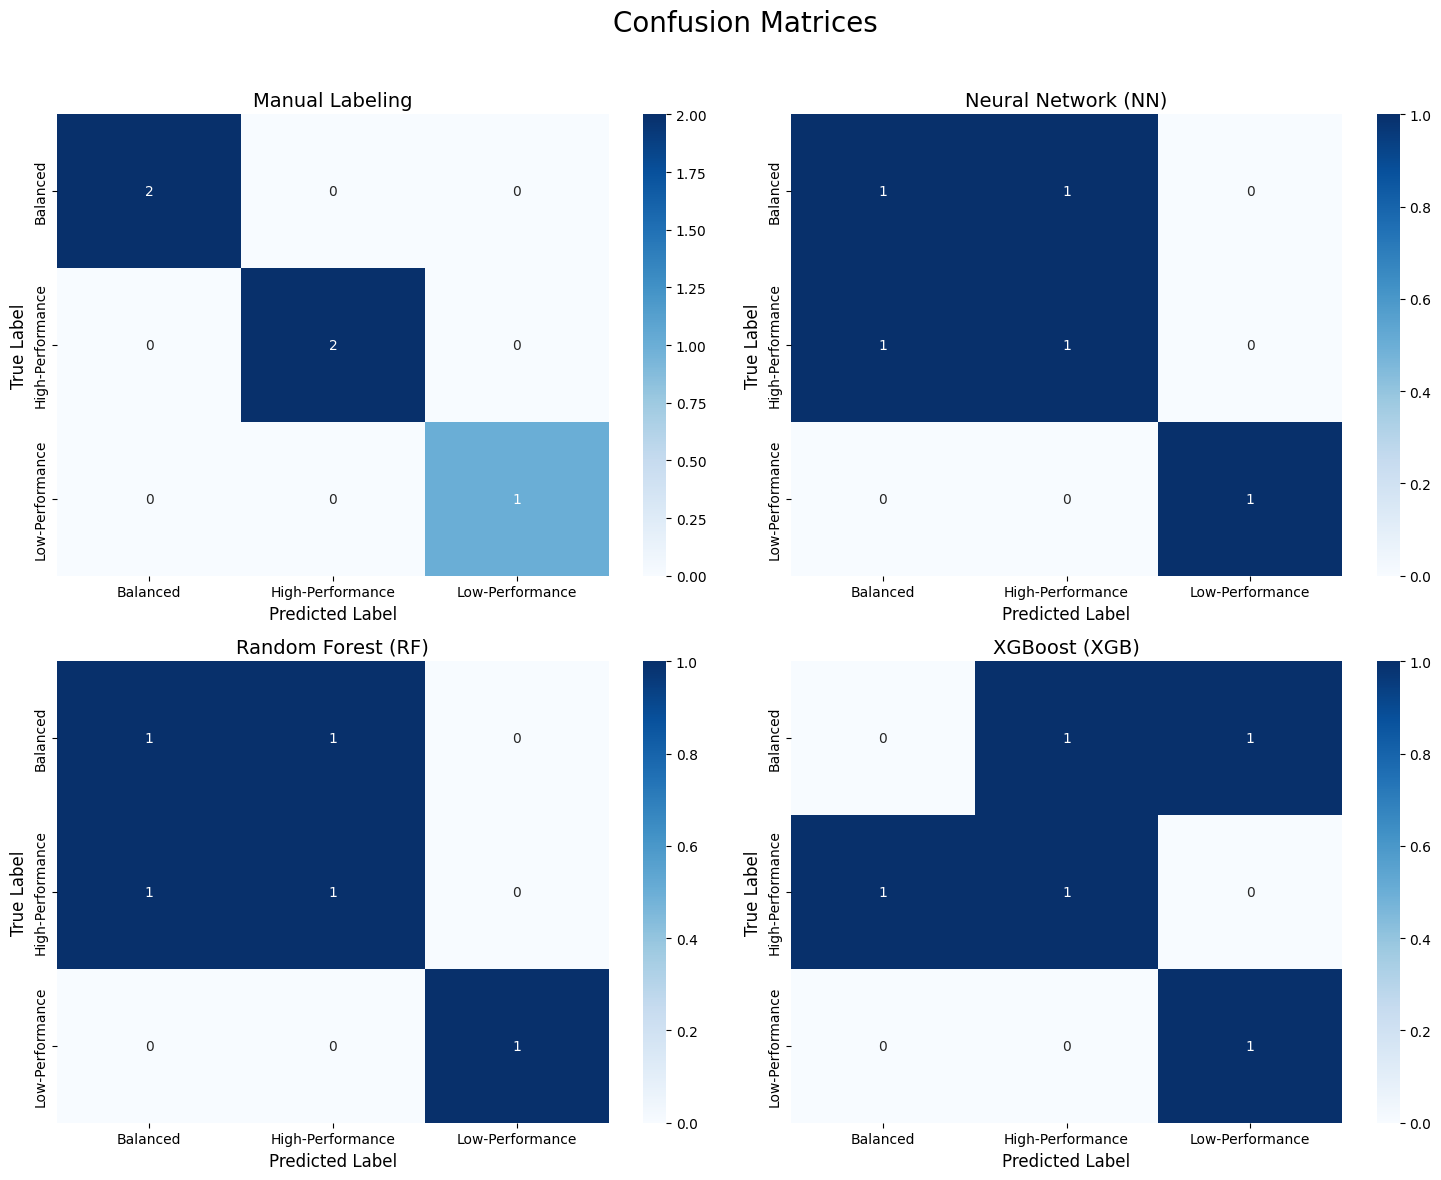

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

data = {
    'Accuracy': [100, 93.80, 97.70, 94.60, 100, 93.70, 97.90, 100, 94, 99, 100, 97.10, 100, 100, 97.90, 99.20],
    'Avg. Time': [1.91, 3.42, 2.06, 2.45, 2.42, 1.90, 3.83, 1.45, 1.08, 1.81, 4.14, 1.69, 1.36, 2.16, 1.88, 1.46]
}
df = pd.DataFrame(data)


def assign_true_label(row):
    accuracy = row['Accuracy']
    avg_time = row['Avg. Time']
    if accuracy < 95:
        return 'Low-Performance'
    elif accuracy > 99 and avg_time < 2.5:
        return 'High-Performance'
    else:
        return 'Balanced'

df['True_Label'] = df.apply(assign_true_label, axis=1)

X = df[['Accuracy', 'Avg. Time']]
y = df['True_Label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
labels = le.classes_ 



# Model 1: Neural Network (NN)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1500, random_state=42)
nn_model.fit(X_train_scaled, y_train_encoded)
y_pred_nn = nn_model.predict(X_test_scaled)

# Model 2: Random Forest (RF) 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_encoded)
y_pred_rf = rf_model.predict(X_test_scaled)

# Model 3: XGBoost (XGB) 
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(labels), seed=42)
xgb_model.fit(X_train_scaled, y_train_encoded)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Method 4: Manual Labeling Rules 
y_pred_manual_str = X_test.apply(assign_true_label, axis=1)
y_pred_manual = le.transform(y_pred_manual_str) # Encode the string predictions

# --- Step 6: Generate and Plot all Confusion Matrices ---
predictions = {
    'Manual Labeling': y_pred_manual,
    'Neural Network (NN)': y_pred_nn,
    'Random Forest (RF)': y_pred_rf,
    'XGBoost (XGB)': y_pred_xgb
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Confusion Matrices', fontsize=20)
axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', ax=axes[i],
                xticklabels=labels, yticklabels=labels)
    axes[i].set_title(model_name, fontsize=14)
    axes[i].set_xlabel('Predicted Label', fontsize=12)
    axes[i].set_ylabel('True Label', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('confusion_matrices.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()